In [1]:
#importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv('Admission_Predict.csv')

# checking head of dataframe
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# extracting the x and y columns
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)
print(y)

[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  2.   324.   107.   ...   4.5    8.87   1.  ]
 [  3.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [498.   330.   120.   ...   5.     9.56   1.  ]
 [499.   312.   103.   ...   5.     8.43   0.  ]
 [500.   327.   113.   ...   4.5    9.04   0.  ]]
[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 

In [7]:
# Feature scalling the x
# Importing standardscalar module  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#fitting
sc_x = sc.fit_transform(x)
print(sc_x)

[[-1.72859016  1.81923762  1.77886545 ...  1.09894429  1.77680627
   0.88640526]
 [-1.72166195  0.66714832 -0.03160087 ...  1.09894429  0.48585943
   0.88640526]
 [-1.71473373 -0.0418297  -0.52536441 ...  0.01730621 -0.95404281
   0.88640526]
 ...
 [ 1.71473373  1.19888185  2.10804114 ...  1.63976333  1.62785086
   0.88640526]
 [ 1.72166195 -0.39631872 -0.68995225 ...  1.63976333 -0.24236699
  -1.12815215]
 [ 1.72859016  0.93301508  0.95592621 ...  1.09894429  0.76721964
  -1.12815215]]


In [8]:
# we will splitting the dataset into training and test set
# because the problem statement is still a classification problem
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(sc_x,y,test_size = 0.1,random_state = 26)
print(x_tr)
print(x_te)
print(y_tr)
print(y_te)

[[-1.69394908  1.19888185  1.28510191 ... -0.52351283  1.26373765
   0.88640526]
 [-1.63159512 -0.48494097 -0.52536441 ... -1.60515091 -0.6230308
   0.88640526]
 [ 0.84177838  0.66714832  0.46216267 ... -0.52351283  1.06513044
   0.88640526]
 ...
 [ 0.08660271 -0.75080773 -0.68995225 ...  0.55812525 -0.3582212
   0.88640526]
 [ 0.47458287  0.66714832  0.62675052 ... -1.60515091  0.37000522
   0.88640526]
 [ 0.41222892 -0.75080773  0.46216267 ... -0.52351283  0.03899321
  -1.12815215]]
[[-0.02424876 -0.0418297  -0.36077656 -0.09979274 -0.37777315  0.01730621
   0.25415102 -1.12815215]
 [ 1.61081047  1.02163734  0.95592621  0.77558214  0.63231549 -1.06433187
   0.32035342  0.88640526]
 [ 0.70321403  0.75577058  0.46216267  0.77558214  0.12727117  0.55812525
   0.15484742  0.88640526]
 [-0.83485016  1.46474861  1.77886545  1.65095702  1.64240413  1.63976333
   1.28028825  0.88640526]
 [-0.50922396  1.11025959  1.94345329  0.77558214  1.13735981  1.09894429
   0.96582684  0.88640526]
 [-0.

In [9]:
#importing and applying PCA to the data
from sklearn.decomposition import PCA
# since we do not know the explained variance of the x variables/columns
# we keep n_components value = None
pca = PCA(n_components=7) 
# after knowing the explained variance of each column we can select the n_componentsin this case
x_tr = pca.fit_transform(x_tr)
x_te = pca.transform(x_te)
print(x_tr)
print(x_te)
print(pca.explained_variance_ratio_)

[[-2.85028299 -1.73788215 -0.68131203 ...  1.17069455  0.04198923
  -0.10249478]
 [ 0.78262712 -1.64962495 -1.22464749 ...  1.06936203 -0.43439913
   0.0244334 ]
 [-1.04544679  0.82749515 -1.0828219  ...  0.11405301 -0.42021415
  -0.38778598]
 ...
 [ 0.91508442  0.42306706 -0.58383888 ... -0.97277703  0.24112501
  -0.04954484]
 [-0.08145077  0.33997721 -1.95859552 ...  0.54165356  0.17009786
  -0.01346822]
 [ 0.20064994  0.11745096  0.96276995 ...  0.93783272  0.16558173
   0.44494083]]
[[ 0.47497097 -0.15110651  0.71786294 -0.63805775 -0.2033618   0.24863198
  -0.51328886]
 [-1.38088604  1.41090463 -1.07365554 -0.89394697  1.22308629 -0.43946493
   0.36424722]
 [-1.40190425  0.86202595 -0.3703314   0.21033444  0.12574547  0.45303668
   0.1764663 ]
 [-4.05067927 -0.64502528  0.41548132  0.2067307  -0.07187134  0.18277784
   0.38631565]
 [-3.11579551 -0.40760006 -0.12514618 -0.11632956 -0.38157687 -0.07491525
   0.74686497]
 [-3.00882965 -0.38921324  0.85326758  1.10505333  0.2866994   

In [10]:
#applying Linear Regression and fitting the training model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [11]:
#predicting the output
y_pred=lr.predict(x_te)
print(y_pred)

[0.71567615 0.8182321  0.80066509 0.92025151 0.87851059 0.83766254
 0.78611757 0.44435161 0.6322208  0.92349302 0.95659348 0.78125975
 0.84277771 0.6348043  0.94762768 0.90424805 0.57733314 0.7609532
 0.90507596 0.48899584 0.76605935 0.91161393 0.88790788 0.61770598
 0.77775677 0.65945054 0.63383865 0.97017319 0.74120916 0.66977872
 0.6143891  0.75719156 0.65018078 0.66608703 0.72393236 0.80111592
 0.75562275 0.82533751 0.84712498 0.90686977 0.96250667 0.85039174
 0.52609434 0.60456271 0.62418082 0.49175767 0.79212775 0.86062271
 0.90850918 0.81476673]


In [12]:
#Finding MSE and Rsquare score values
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_te,y_pred)
mae=mean_absolute_error(y_te,y_pred)
mse=mean_squared_error(y_te,y_pred)
rmse=np.sqrt(mse)
print("RMSE",rmse)
print("MAE",mae)
print("MSE",mse)
print("Rscore",r2)

RMSE 0.04663008176664014
MAE 0.033048977155324
MSE 0.002174364525563545
Rscore 0.9073206727389632


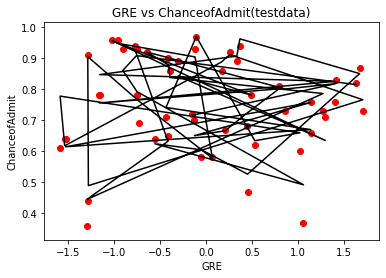

In [13]:
plt.scatter(x_te[:,1],y_te,color='red')
plt.plot(x_te[:,1],y_pred,color='black')
plt.title('GRE vs ChanceofAdmit(testdata)')
plt.xlabel('GRE')
plt.ylabel('ChanceofAdmit')
plt.show()

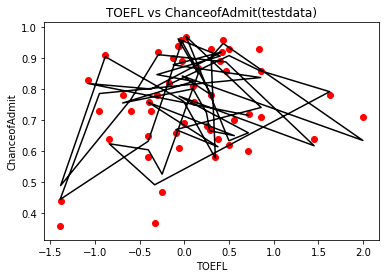

In [14]:
plt.scatter(x_te[:,2],y_te,color='red')
plt.plot(x_te[:,2],y_pred,color='black')
plt.title('TOEFL vs ChanceofAdmit(testdata)')
plt.xlabel('TOEFL')
plt.ylabel('ChanceofAdmit')
plt.show()

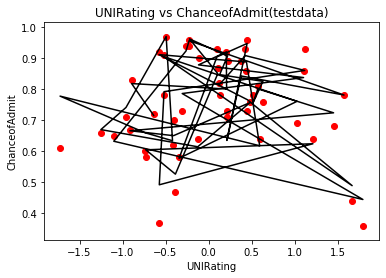

In [15]:
plt.scatter(x_te[:,3],y_te,color='red')
plt.plot(x_te[:,3],y_pred,color='black')
plt.title('UNIRating vs ChanceofAdmit(testdata)')
plt.xlabel('UNIRating')
plt.ylabel('ChanceofAdmit')
plt.show()

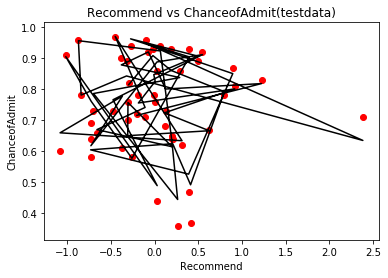

In [16]:
plt.scatter(x_te[:,4],y_te,color='red')
plt.plot(x_te[:,4],y_pred,color='black')
plt.title('Recommend vs ChanceofAdmit(testdata)')
plt.xlabel('Recommend')
plt.ylabel('ChanceofAdmit')
plt.show()

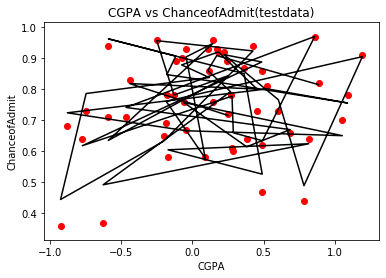

In [17]:
plt.scatter(x_te[:,5],y_te,color='red')
plt.plot(x_te[:,5],y_pred,color='black')
plt.title('CGPA vs ChanceofAdmit(testdata)')
plt.xlabel('CGPA')
plt.ylabel('ChanceofAdmit')
plt.show()

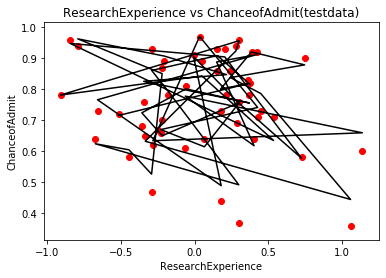

In [18]:
plt.scatter(x_te[:,6],y_te,color='red')
plt.plot(x_te[:,6],y_pred,color='black')
plt.title('ResearchExperience vs ChanceofAdmit(testdata)')
plt.xlabel('ResearchExperience')
plt.ylabel('ChanceofAdmit')
plt.show()

    Actual  Predicted
0     0.72   0.715676
1     0.83   0.818232
2     0.73   0.800665
3     0.92   0.920252
4     0.90   0.878511
5     0.86   0.837663
6     0.73   0.786118
7     0.36   0.444352
8     0.65   0.632221
9     0.94   0.923493
10    0.96   0.956593
11    0.78   0.781260
12    0.89   0.842778
13    0.71   0.634804
14    0.96   0.947628
15    0.93   0.904248
16    0.58   0.577333
17    0.69   0.760953
18    0.91   0.905076
19    0.44   0.488996
20    0.73   0.766059
21    0.92   0.911614
22    0.86   0.887908
23    0.64   0.617706
24    0.61   0.777757
25    0.60   0.659451
26    0.62   0.633839
27    0.97   0.970173
28    0.71   0.741209
29    0.66   0.669779
30    0.64   0.614389
31    0.76   0.757192
32    0.70   0.650181
33    0.67   0.666087
34    0.68   0.723932
35    0.81   0.801116
36    0.78   0.755623
37    0.76   0.825338
38    0.78   0.847125
39    0.89   0.906870
40    0.94   0.962507
41    0.87   0.850392
42    0.47   0.526094
43    0.58   0.604563
44    0.64

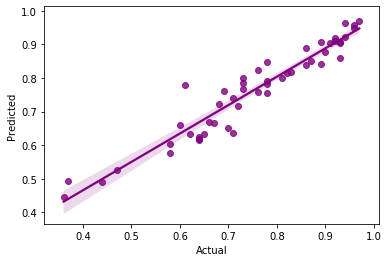

In [19]:
mlr_df=pd.DataFrame({'Actual':np.array(y_te)[:],'Predicted':np.array(y_pred)[:]})
print(mlr_df)
sns.regplot(mlr_df['Actual'],mlr_df['Predicted'],fit_reg=True, color = "purple")
plt.show()
